# SOPHY Database
### Southern Ocean Phytoplankton Database
- Made by Ayush Nag and Hannah-Joy Warren (add others)
- UW Oceanography (add other credits)

In [2]:
import sqlite3
import pandas as pd
import pyworms
from pandas import DataFrame
import cartopy.feature
import matplotlib.pyplot as plt 
import scipy.io as sio
from shapely.geometry import Polygon, Point, MultiPoint, LineString
import cartopy.crs as ccrs
import fiona
import numpy as np
import shapely
import matplotlib.path as mpath
import geopandas as gpd
import shapely.validation
import pyproj
import alphashape
from shapely.ops import transform
from geolabel import GeoLabel

In [ ]:
con = sqlite3.connect("sophy.db")
cur = con.cursor()

Sample functions to use

In [ ]:
# functions with common use cases
# results at lat long
# distance and time for lat long
# take in a list of values that represent a path and get all results (within certain range of provided values )
# fronts, sectors
# default definition of sectors, fronts that can be easily updated 

# filter by front zones and sectors


Read from the SOPHY database and receive a DataFrame <br />
Write SQLite queries directly

In [ ]:
import warnings


query = "select scientific_name from microscopy"
pd.read_sql_query(query, con)

In [ ]:
pd.read_pickle(r"C:\users\ayush nag\Downloads\data\02_intermediate\SOCCOM_bgc_argo_float_data\all_floatdata_analyzed.pkl")

In [ ]:
# map_proj = ccrs.SouthPolarStereo()
# fig = plt.figure(figsize=[20, 20])  # inches
# ax = plt.subplot(projection=map_proj)
# ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
# fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)
#
# ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.COASTLINE)
# ax.gridlines(draw_labels=True)

# Writes the Kim & Orsi 2014 fronts to a shapefile
mat_data: dict = sio.loadmat("../data/fronts/ys_fronts.mat")
# fronts = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_fronts: tuple = mat_data['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_fronts = orsi_fronts[:4]
colors = ['c', 'b', 'g', 'r']
wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:9354')

In [ ]:
# front = orsi_fronts[0].T
# # remove points where latitude is negative (range is [0, 360])
# extra = np.where(front[0] < 0)
# lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
# lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
# # lat, lon = np.append(lat, lat[0]), np.append(lon, lon[0])
# points = np.stack((lat, lon), axis=-1)
# # new_points = map_proj.transform_points(ccrs.PlateCarree(), lat, lon)
# # points = np.round(points, 3)
# # poly = Polygon(points)
# plt.plot(lat, lon)
# plt.show()
# # ax.plot(front[0], front[1], marker='o', linestyle='', color=colors[i], transform=ccrs.PlateCarree())
temp = [0, 1550, 1734, 1488]
transformed: list = []

for f in orsi_fronts:
    front = f.T
    extra = np.where(front[0] < 0)
    lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    x = np.stack((lat, lon))
    plt.plot(lat, lon)
plt.show()


In [ ]:
front = orsi_fronts[0].T
extra = np.where(front[0] > 180)
lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
misc = np.arange(20, 40)
lat, lon = np.delete(lat, misc), np.delete(lon, misc)
polygon_geom = Polygon(zip(lat, lon))
# ax.add_geometries([polygon_geom], crs=ccrs.SouthPolarStereo(), facecolor='b', edgecolor='red', alpha=0.8)
# plt.show()

In [8]:
df = pd.read_csv("../data/datasets/lter.csv", encoding='unicode_escape')
# lter_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs='EPSG:4326')
# lter_gdf = lter_gdf.to_crs(epsg=3031, inplace=True)
GeoLabel.label_zones(df, 'Latitude', 'Longitude')[['Latitude', 'Longitude', 'zone']]

,Latitude,Longitude,zone
0,-64.83333,-64.05167,SOZ
1,-64.83333,-64.05167,SOZ
2,-64.83333,-64.05167,SOZ
3,-64.83333,-64.05167,SOZ
4,-64.83333,-64.05167,SOZ
...,...,...,...
9382,-61.80167,-57.13900,PFZ
9383,-61.97383,-57.14250,PFZ
9384,-62.09550,-57.36767,PFZ
9385,-62.17417,-57.73450,PFZ


In [3]:
f = open(r"../data/sea_ice/mean.sep.1979-2021.s", "r")
np.fromfile(f, dtype=np.uint8)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

<AxesSubplot:>

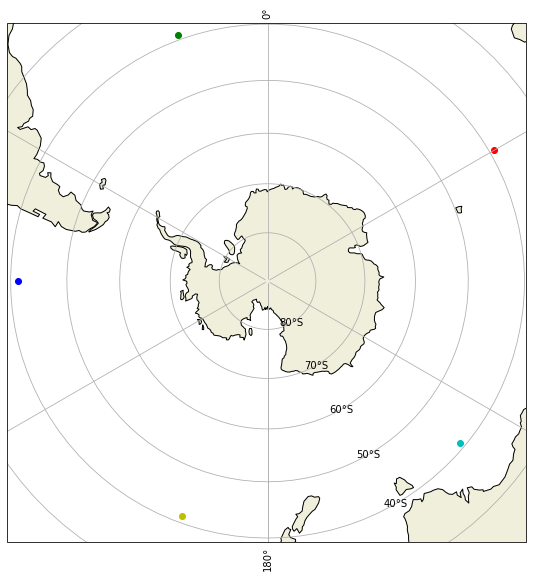

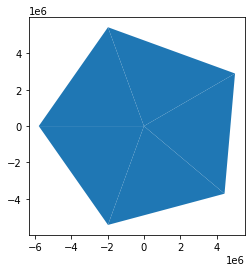

In [426]:
map_proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=[8, 8])  # inches
ax = plt.subplot(projection=map_proj)
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines(draw_labels=True)

ax.plot(60, -39.23, marker='o', linestyle='', color='r', transform=ccrs.PlateCarree())
ax.plot(-20, -39.23, marker='o', linestyle='', color='g', transform=ccrs.PlateCarree())
ax.plot(-90, -41.23, marker='o', linestyle='', color='b', transform=ccrs.PlateCarree())
ax.plot(-160, -41.23, marker='o', linestyle='', color='y', transform=ccrs.PlateCarree())
ax.plot(130, -41, marker='o', linestyle='', color='c', transform=ccrs.PlateCarree())
# ax.plot(170, -41, marker='o', linestyle='', color='c', transform=ccrs.PlateCarree())

sectors: list = []
sectors.append(Polygon([(60, -40), (-20, -40), (0, -90)]))
sectors.append(Polygon([(-20, -40), (-90, -40), (0, -90)]))
sectors.append(Polygon([(-90, -40), (-160, -40), (0, -90)]))
sectors.append(Polygon([(-160, -40), (130, -40), (0, -90)]))
sectors.append(Polygon([(130, -40), (60, -40), (0, -90)]))

sectors_dict: dict = {'sector': ['A', 'B', 'C', 'D', 'E'], 'geometry': sectors}
sectors_gdf = gpd.GeoDataFrame(sectors_dict, crs='EPSG:4326')
sectors_gdf = sectors_gdf.to_crs(crs='EPSG:3031')
sectors_gdf.plot()
# plt.show()

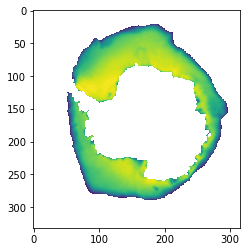

In [130]:
# Author: Filipe Fernandes
f = open(r"../data/sea_ice/mean.sep.1979-2021.s", "r")
ice = np.fromfile(f, dtype=np.uint8)
ice=ice.reshape(332,316)
#Convert to the fractional parameter range of 0.0 to 1.0
ice = ice/250.
#mask all land and missing values
ice=np.ma.masked_greater(ice,1.0)
ice=np.ma.masked_less(ice, 0.15)
#Show ice concentration
plt.imshow(ice)

hi


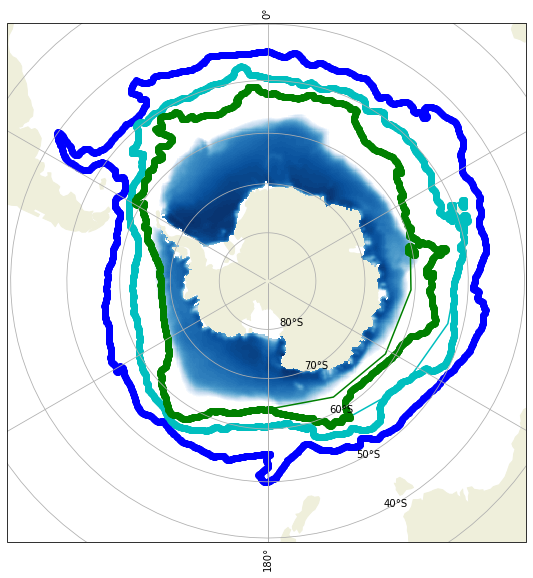

In [418]:
f = open(r"../data/sea_ice/mean.sep.1979-2021.s", "r")
ice = np.fromfile(f, dtype=np.uint8)
ice=ice.reshape(332,316)
#Convert to the fractional parameter range of 0.0 to 1.0
ice = ice/250.
#mask all land and missing values
ice=np.ma.masked_greater(ice,1.0)
ice=np.ma.masked_less(ice, 0.15)

map_proj = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=[8, 8])  # inches
ax = plt.subplot(projection=map_proj)
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines(draw_labels=True)

dx = dy = 25000

x = np.arange(-3950000, +3950000, +dx)
y = np.arange(+4350000, -3950000, -dy)
points = np.dstack(np.meshgrid(x, y)).reshape(-1, 2).T
print('hi')
cs = ax.pcolormesh(x, y, ice, cmap=plt.cm.Blues, transform=ccrs.SouthPolarStereo())
# ax.plot(points[0], points[1], marker='o', linestyle='', color='g', transform=ccrs.SouthPolarStereo())

mat_data: dict = sio.loadmat(GeoLabel.kim_orsi_file)
# mat_data = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_fronts: tuple = mat_data['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_fronts = orsi_fronts[:3]
colors = ['b', 'c', 'g', 'r']
for i, orsi_front in enumerate(orsi_fronts):
    front = orsi_front.T
    # data has points [-180, 360] but [-180, 180] is duplicate of [0, 360]
    extra = np.where(front[0] > 180)
    # delete [180, 360]
    lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    # remove NaN's
    lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    ax.plot(lat, lon, marker='o', color=colors[i], transform=ccrs.PlateCarree())
plt.show()


In [4]:
f = open(r"../data/sea_ice/mean.sep.1979-2021.s", "r")
ice = np.fromfile(f, dtype=np.uint8)
edge = np.logical_and(15 <= ice, ice <= 25)
dx = dy = 25000
x = np.arange(-3950000, +3950000, +dx)
y = np.arange(+4350000, -3950000, -dy)
grid = np.dstack(np.meshgrid(x, y)).reshape(-1, 2)
points = grid[edge].T
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x=points[0], y=points[1]), crs='EPSG:3031')
# Generating alpha shape takes ~10 mins
alpha: gpd.GeoDataFrame = alphashape.alphashape(gdf)
sie: Polygon = alpha['geometry'].values[0]
alpha
# ax.plot(points[0], points[1], marker='o', linestyle='', color='g', transform=ccrs.SouthPolarStereo())

C:\Users\Ayush Nag\miniconda3\envs\sophyenv\lib\site-packages\shapely\ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
C:\Users\Ayush Nag\miniconda3\envs\sophyenv\lib\site-packages\alphashape\optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


,geometry
0,"POLYGON ((-2600000.000 2125000.000, -2575000.0..."


<AxesSubplot:>

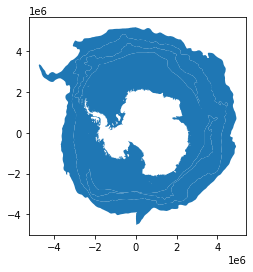

In [11]:
# Writes the Kim & Orsi 2014 fronts to a shapefile
mat_data: dict = sio.loadmat('../data/fronts/ys_fronts.mat')
# fronts = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_data: tuple = mat_data['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_data = orsi_data[:3]
# points from each front that follow a smooth contour (no holes in the front)
keep = ((44, 2633), (0, 2305), (0, 2614))
front_names: tuple = ('SAF', 'PF', 'SACC')
shapes: dict = {}
project = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), pyproj.CRS('EPSG:3031'), always_xy=True).transform
for i, orsi_front in enumerate(orsi_data):
    # convert np array to df
    front_df = pd.DataFrame(data=orsi_front, columns=['Latitude', 'Longitude'],
                            index=np.arange(len(orsi_front)))
    # remove extra points such as small holes in the front
    front_df = front_df.iloc[keep[i][0]:keep[i][1]]
    # data has points [-180, 360] but [-180, 180] is duplicate of [0, 360]
    front_df = front_df[front_df.Latitude <= 180]
    # make new polygon and add to list
    name = front_names[i]
    shapes[name] = transform(project, (Polygon(zip(front_df.Latitude, front_df.Longitude))))

world: gpd.GeoDataFrame = gpd.read_file('../data/shapefiles/world/world.shp')
antarctica: gpd.GeoDataFrame = world[world['NAME'] == 'Antarctica']
antarctica = antarctica.to_crs(epsg=3031)
antarctica: Polygon = antarctica['geometry'].values[0]


shapes['SIE'] = alpha['geometry'].values[0]
fronts_gdf = gpd.GeoDataFrame({'front': shapes.keys(), 'geometry': shapes.values()}, crs='EPSG:3031')
zones: dict = {'zone': ['PFZ', 'ASZ', 'SOZ', 'SIZ'], 'geometry': [shapes['SAF'] - shapes['PF'],
                                                                  shapes['PF'] - shapes['SACC'],
                                                                  shapes['SACC'] - shapes['SIE'],
                                                                  shapes['SIE'] - antarctica]}
zones_gdf = gpd.GeoDataFrame(zones, crs='EPSG:3031')
zones_gdf.plot()

<AxesSubplot:>

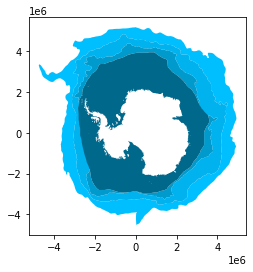

In [24]:
gpd.read_file("../data/shapefiles/zones/so_zones.shp").plot(color=['#00BFFF', '#00B2EE', '#009ACD', '#00688B'])

C:\Program Files\JetBrains\PyCharm 2022.2\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_xml.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  xml_shape = ' shape="%s"' % make_valid_xml_value("%s" % str(len(v)))
C:\Program Files\JetBrains\PyCharm 2022.2\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_xml.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  xml_shape = ' shape="%s"' % make_valid_xml_value("%s" % str(len(v)))
C:\Program Files\JetBrains\PyCharm 2022.2\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_xml.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Chec

KeyboardInterrupt: 